In [2]:
%config Completer.use_jedi = False

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import missingno as msno 

In [4]:
df = pd.read_csv("Bike.csv")
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2018 00:00,1,0,0,1,9.84,14.395,81.0,0.0000,3,13,16
1,01-01-2018 01:00,1,0,0,1,9.02,13.635,80.0,0.0000,8,32,40
2,01-01-2018 02:00,1,0,0,1,9.02,13.635,80.0,0.0000,5,27,32
3,01-01-2018 03:00,1,0,0,1,9.84,14.395,NaN,0.0000,3,10,13
4,01-01-2018 04:00,1,0,0,1,9.84,14.395,75.0,0.0000,0,1,1
5,01-01-2018 05:00,1,0,0,2,9.84,12.880,75.0,6.0032,0,1,1
6,01-01-2018 06:00,1,0,0,1,9.02,13.635,80.0,0.0000,2,0,2
7,01-01-2018 07:00,1,0,0,1,8.20,12.880,NaN,0.0000,1,2,3
8,01-01-2018 08:00,1,0,0,1,9.84,14.395,75.0,0.0000,1,7,8
9,01-01-2018 09:00,1,0,0,1,13.12,17.425,76.0,0.0000,8,6,14


In [5]:
df.shape

(10886, 12)

## DATA PRE-PROCESSING

### Finding Missing Values

In [6]:
missing_data = df.isnull()
missing_data.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,True,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


### Count Missing Values

In [7]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

datetime
False    10886
Name: datetime, dtype: int64

season
False    10886
Name: season, dtype: int64

holiday
False    10886
Name: holiday, dtype: int64

workingday
False    10886
Name: workingday, dtype: int64

weather
False    10886
Name: weather, dtype: int64

temp
False    10886
Name: temp, dtype: int64

atemp
False    10886
Name: atemp, dtype: int64

humidity
False    10880
True         6
Name: humidity, dtype: int64

windspeed
False    10886
Name: windspeed, dtype: int64

casual
False    10886
Name: casual, dtype: int64

registered
False    10886
Name: registered, dtype: int64

count
False    10886
Name: count, dtype: int64



### Replacing Missing Values

In [8]:
avg_humidity = df["humidity"].astype("float").mean(axis=0)
print("Average Humidity:", avg_humidity)

Average Humidity: 61.87950367647059


In [9]:
df["humidity"].replace(np.nan, avg_humidity, inplace=True)

In [10]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2018 00:00,1,0,0,1,9.84,14.395,81.000000,0.0000,3,13,16
1,01-01-2018 01:00,1,0,0,1,9.02,13.635,80.000000,0.0000,8,32,40
2,01-01-2018 02:00,1,0,0,1,9.02,13.635,80.000000,0.0000,5,27,32
3,01-01-2018 03:00,1,0,0,1,9.84,14.395,61.879504,0.0000,3,10,13
4,01-01-2018 04:00,1,0,0,1,9.84,14.395,75.000000,0.0000,0,1,1
5,01-01-2018 05:00,1,0,0,2,9.84,12.880,75.000000,6.0032,0,1,1
6,01-01-2018 06:00,1,0,0,1,9.02,13.635,80.000000,0.0000,2,0,2
7,01-01-2018 07:00,1,0,0,1,8.20,12.880,61.879504,0.0000,1,2,3
8,01-01-2018 08:00,1,0,0,1,9.84,14.395,75.000000,0.0000,1,7,8
9,01-01-2018 09:00,1,0,0,1,13.12,17.425,76.000000,0.0000,8,6,14


### Check if Missing values exist

<AxesSubplot:>

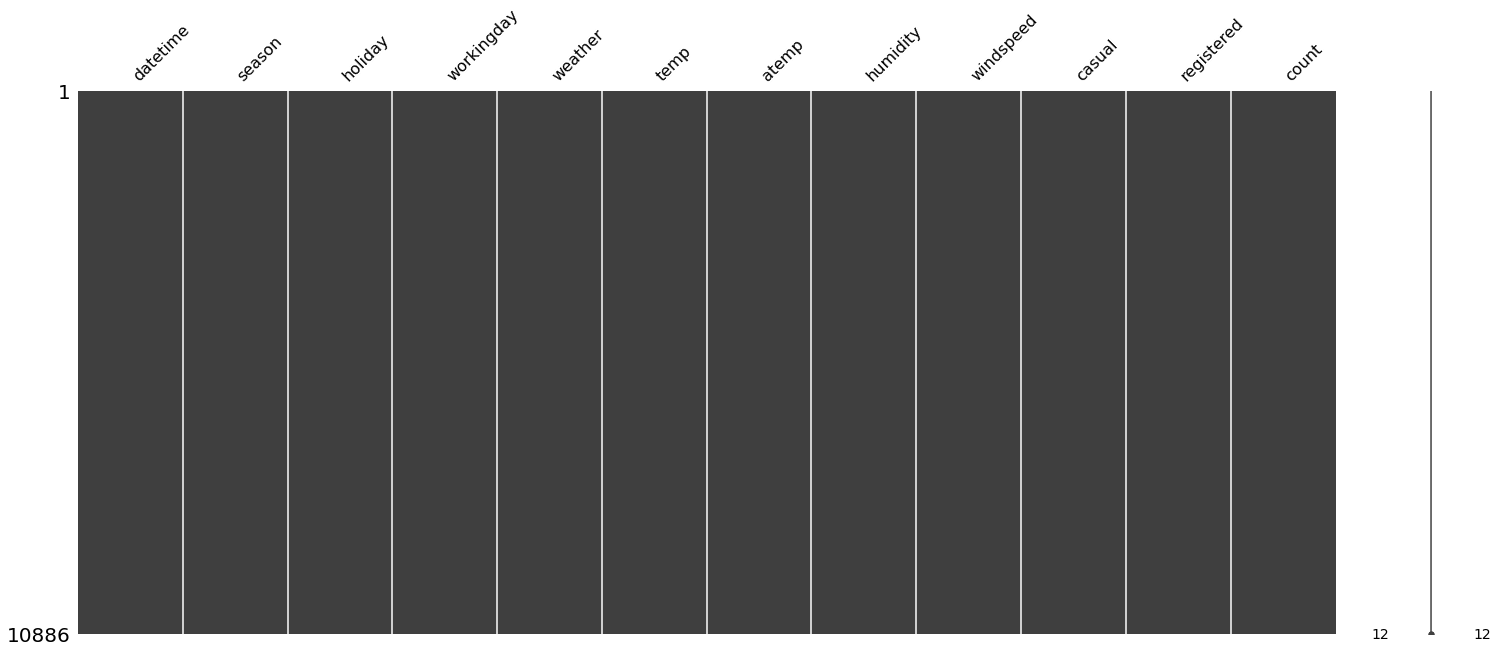

In [11]:
msno.matrix(df)

### Check Datatypes 

In [12]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [13]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.879504,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.238558,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## FEATURE ENGINEERING

### Split DateTime for getting better insights from data 

In [14]:
temp = pd.DatetimeIndex(df['datetime'])
df['year'] = temp.year
df['month'] = temp.month
df['hour'] = temp.hour
df['weekday'] = temp.weekday
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,weekday
0,01-01-2018 00:00,1,0,0,1,9.84,14.395,81.000000,0.0,3,13,16,2018,1,0,0
1,01-01-2018 01:00,1,0,0,1,9.02,13.635,80.000000,0.0,8,32,40,2018,1,1,0
2,01-01-2018 02:00,1,0,0,1,9.02,13.635,80.000000,0.0,5,27,32,2018,1,2,0
3,01-01-2018 03:00,1,0,0,1,9.84,14.395,61.879504,0.0,3,10,13,2018,1,3,0
4,01-01-2018 04:00,1,0,0,1,9.84,14.395,75.000000,0.0,0,1,1,2018,1,4,0


### Drop DateTime

In [15]:
df  = df.drop(["datetime"],axis=1)

## EXPLORATORY DATA ANALYSIS - Visualization

### Bar Plot Grouped by season 

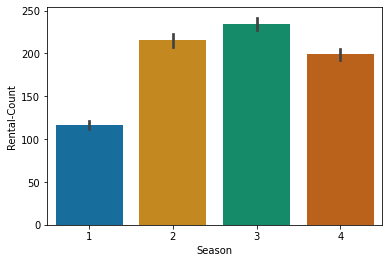

In [16]:
sns.barplot(x='season', y='count', data=df,palette="colorblind")
plt.xlabel('Season')
plt.ylabel('Rental-Count')
plt.rcParams["figure.figsize"] = (6, 5)

### Box Plot Grouped by season

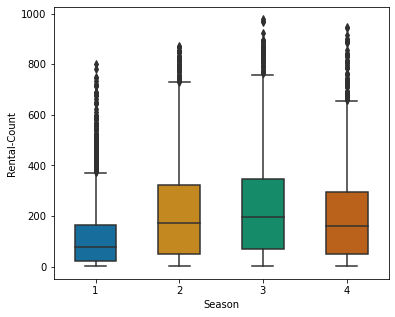

In [17]:
season_group= (df.groupby("season"))["count"].sum()
season_group.reset_index(name="total_rentals")
sns.boxplot(y='count',x='season',data=df,width=0.5,palette="colorblind")
plt.xlabel('Season')
plt.ylabel('Rental-Count')
plt.show()

### Bar Plot Grouped by Weekday

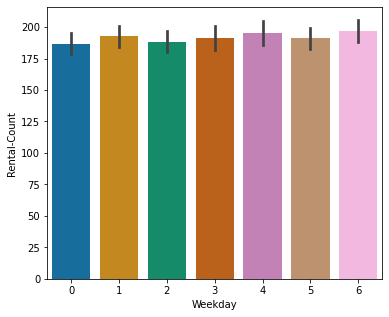

In [18]:
weekday_group= (df.groupby("weekday"))["count"].sum()
weekday_group.reset_index(name="total_rentals")
sns.barplot(y='count',x='weekday',data=df,palette="colorblind")
plt.xlabel('Weekday')
plt.ylabel('Rental-Count')
plt.show()

### Box Plot Grouped by Weekday 

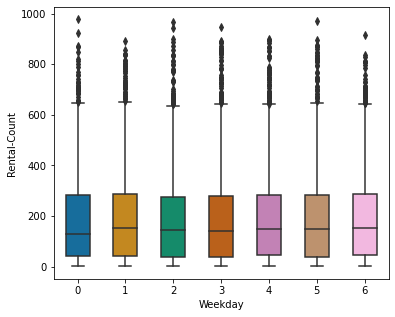

In [19]:
weekday_group= (df.groupby("weekday"))["count"].sum()
weekday_group.reset_index(name="total_rentals")
sns.boxplot(y='count',x='weekday',data=df,width=0.5,palette="colorblind")
plt.xlabel('Weekday')
plt.ylabel('Rental-Count')
plt.show()

### Bar Plot Grouped by Working and Non-Working day

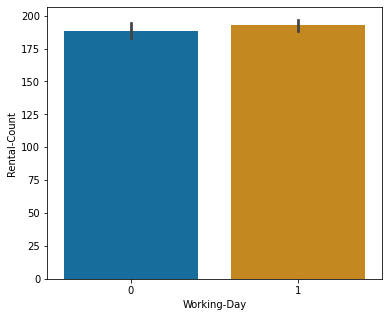

In [20]:
wd_group= (df.groupby("workingday"))["count"].sum()
wd_group.reset_index(name="total_rentals")
sns.barplot(y='count',x='workingday',data=df,palette="colorblind")
plt.xlabel('Working-Day')
plt.ylabel('Rental-Count')
plt.rcParams["figure.figsize"] = (6, 5)

### Box Plot Grouped by Working and Non-Working Day

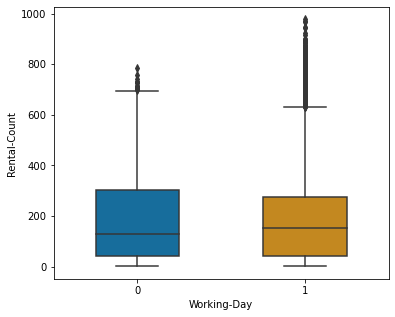

In [21]:
wd_group= (df.groupby("workingday"))["count"].sum()
wd_group.reset_index(name="total_rentals")
sns.boxplot(y='count',x='workingday',data=df,width=0.5,palette="colorblind")
plt.xlabel('Working-Day')
plt.ylabel('Rental-Count')
plt.show()

### Bar Plot Grouped by Weather

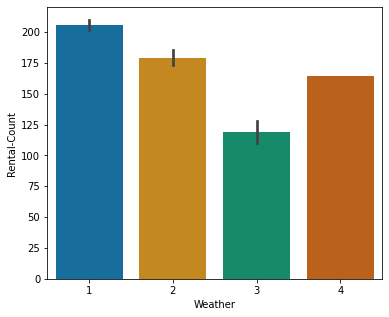

In [22]:
sns.barplot(x='weather', y='count', data=df,palette="colorblind")
plt.xlabel('Weather')
plt.ylabel('Rental-Count')
plt.rcParams["figure.figsize"] = (6, 5)

### Box Plot Grouped by Weather

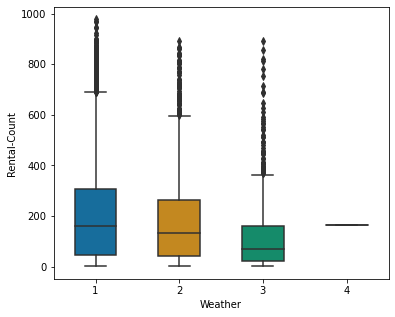

In [23]:
weather_group= (df.groupby("weather"))["count"].sum()
weather_group.reset_index(name="total_rentals")
sns.boxplot(y='count',x='weather',data=df,width=0.5,palette="colorblind")
plt.rcParams["figure.figsize"] = (8, 6)
plt.xlabel('Weather')
plt.ylabel('Rental-Count')
plt.show()

### Bar Plot Grouped by Seasons of Year

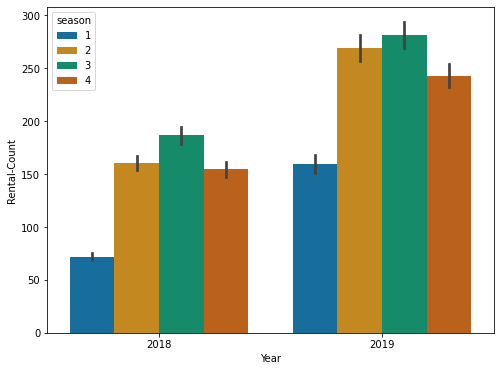

In [24]:
sns.barplot(y='count',x='year',data=df,hue='season',palette="colorblind")
plt.xlabel('Year')
plt.ylabel('Rental-Count')
plt.rcParams["figure.figsize"] = (6.5, 6)

### Bar Plot Grouped by Seasons of Year

Text(0, 0.5, 'Rental-Count')

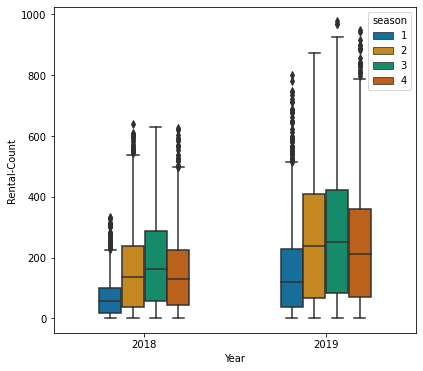

In [25]:
sns.boxplot(y='count',x='year',data=df,hue='season',width=0.5,palette="colorblind")
plt.xlabel('Year')
plt.ylabel('Rental-Count')

### Bar Plot Grouped by Year

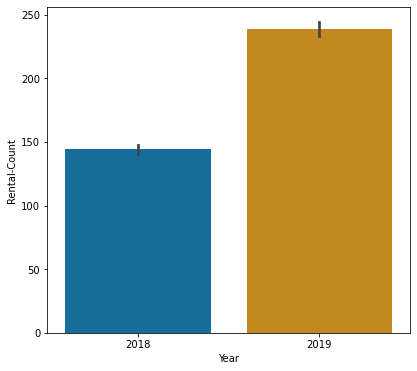

In [26]:
year_group= (df.groupby("year"))["count"].sum()
year_group.reset_index(name="total_rentals")
sns.barplot(y='count',x='year',data=df,palette="colorblind")
plt.xlabel('Year')
plt.ylabel('Rental-Count')
plt.rcParams["figure.figsize"] = (5, 5)

### Box Plot Grouped by Year

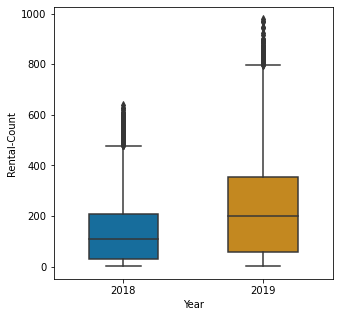

In [27]:
year_group= (df.groupby("year"))["count"].sum()
year_group.reset_index(name="total_rentals")
sns.boxplot(y='count',x='year',data=df,width=0.5,palette="colorblind")
plt.xlabel('Year')
plt.ylabel('Rental-Count')
plt.show()

### Bar Plot Grouped by Month 

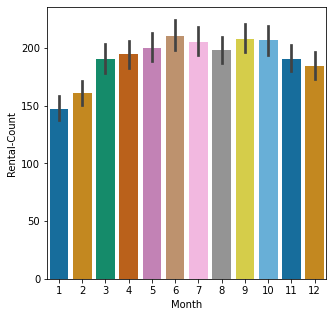

In [28]:
month_group= (df.groupby("month"))["count"].sum()
month_group.reset_index(name="total_rentals")
sns.barplot(y='count',x='month',data=df,palette="colorblind")
plt.xlabel('Month')
plt.ylabel('Rental-Count')
plt.rcParams["figure.figsize"] = (8, 6)

### Box Plot Grouped by Month 

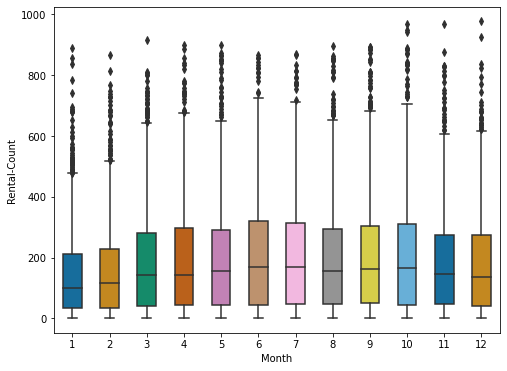

In [29]:
month_group= (df.groupby("month"))["count"].sum()
month_group.reset_index(name="total_rentals")
sns.boxplot(y='count',x='month',data=df,width=0.5,palette="colorblind")
plt.xlabel('Month')
plt.ylabel('Rental-Count')
plt.show()

### Bar Plot Grouped by Hour

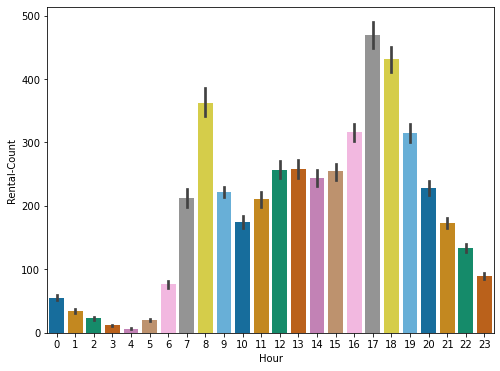

In [30]:
hour_group= (df.groupby("hour"))["count"].sum()
hour_group.reset_index(name="total_rentals")
sns.barplot(y='count',x='hour',data=df,palette="colorblind")
plt.xlabel('Hour')
plt.ylabel('Rental-Count')
plt.show()

# Average Users Count By Hour Of The Day Across Season

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Season'),
 None]

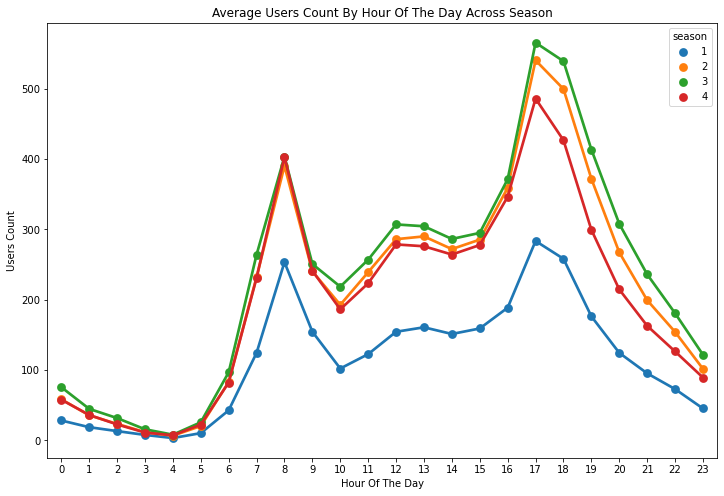

In [31]:
fig,(ax2)= plt.subplots()
fig.set_size_inches(12,8)

hourAggregated = pd.DataFrame(df.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')


## MODEL BUILDING 

### Understand dependencies between Attributes

In [32]:
corr = df.corr()
corr.style.background_gradient().set_precision(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,weekday
season,1.0,0.0,-0.0,0.0,0.3,0.3,0.2,-0.1,0.1,0.2,0.2,-0.0,0.4,-0.0,-0.0
holiday,0.0,1.0,-0.3,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.1,-0.0,0.1
workingday,-0.0,-0.3,1.0,0.0,0.0,0.0,-0.0,0.0,-0.3,0.1,0.0,-0.0,0.0,0.0,0.1
weather,0.0,-0.0,0.0,1.0,-0.1,-0.1,0.4,0.0,-0.1,-0.1,-0.1,-0.0,-0.0,-0.0,0.0
temp,0.3,0.0,0.0,-0.1,1.0,1.0,-0.1,-0.0,0.5,0.3,0.4,0.1,0.0,0.1,0.0
atemp,0.3,-0.0,0.0,-0.1,1.0,1.0,-0.0,-0.1,0.5,0.3,0.4,0.1,0.0,0.1,0.0
humidity,0.2,0.0,-0.0,0.4,-0.1,-0.0,1.0,-0.3,-0.3,-0.3,-0.3,-0.1,0.0,-0.3,0.0
windspeed,-0.1,0.0,0.0,0.0,-0.0,-0.1,-0.3,1.0,0.1,0.1,0.1,-0.0,-0.0,0.1,-0.0
casual,0.1,0.0,-0.3,-0.1,0.5,0.5,-0.3,0.1,1.0,0.5,0.7,0.1,0.0,0.3,-0.0
registered,0.2,-0.0,0.1,-0.1,0.3,0.3,-0.3,0.1,0.5,1.0,1.0,0.3,0.1,0.4,0.0


### Dependencies using HeatMap 

<AxesSubplot:>

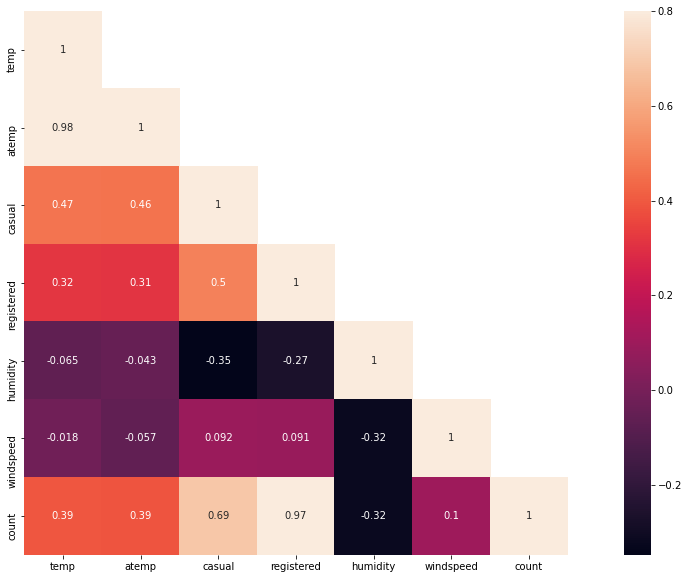

In [33]:
corrMatt = df[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

## Finding Relationship using Scatter Plots

C:\Users\Tauseef Ahmed\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


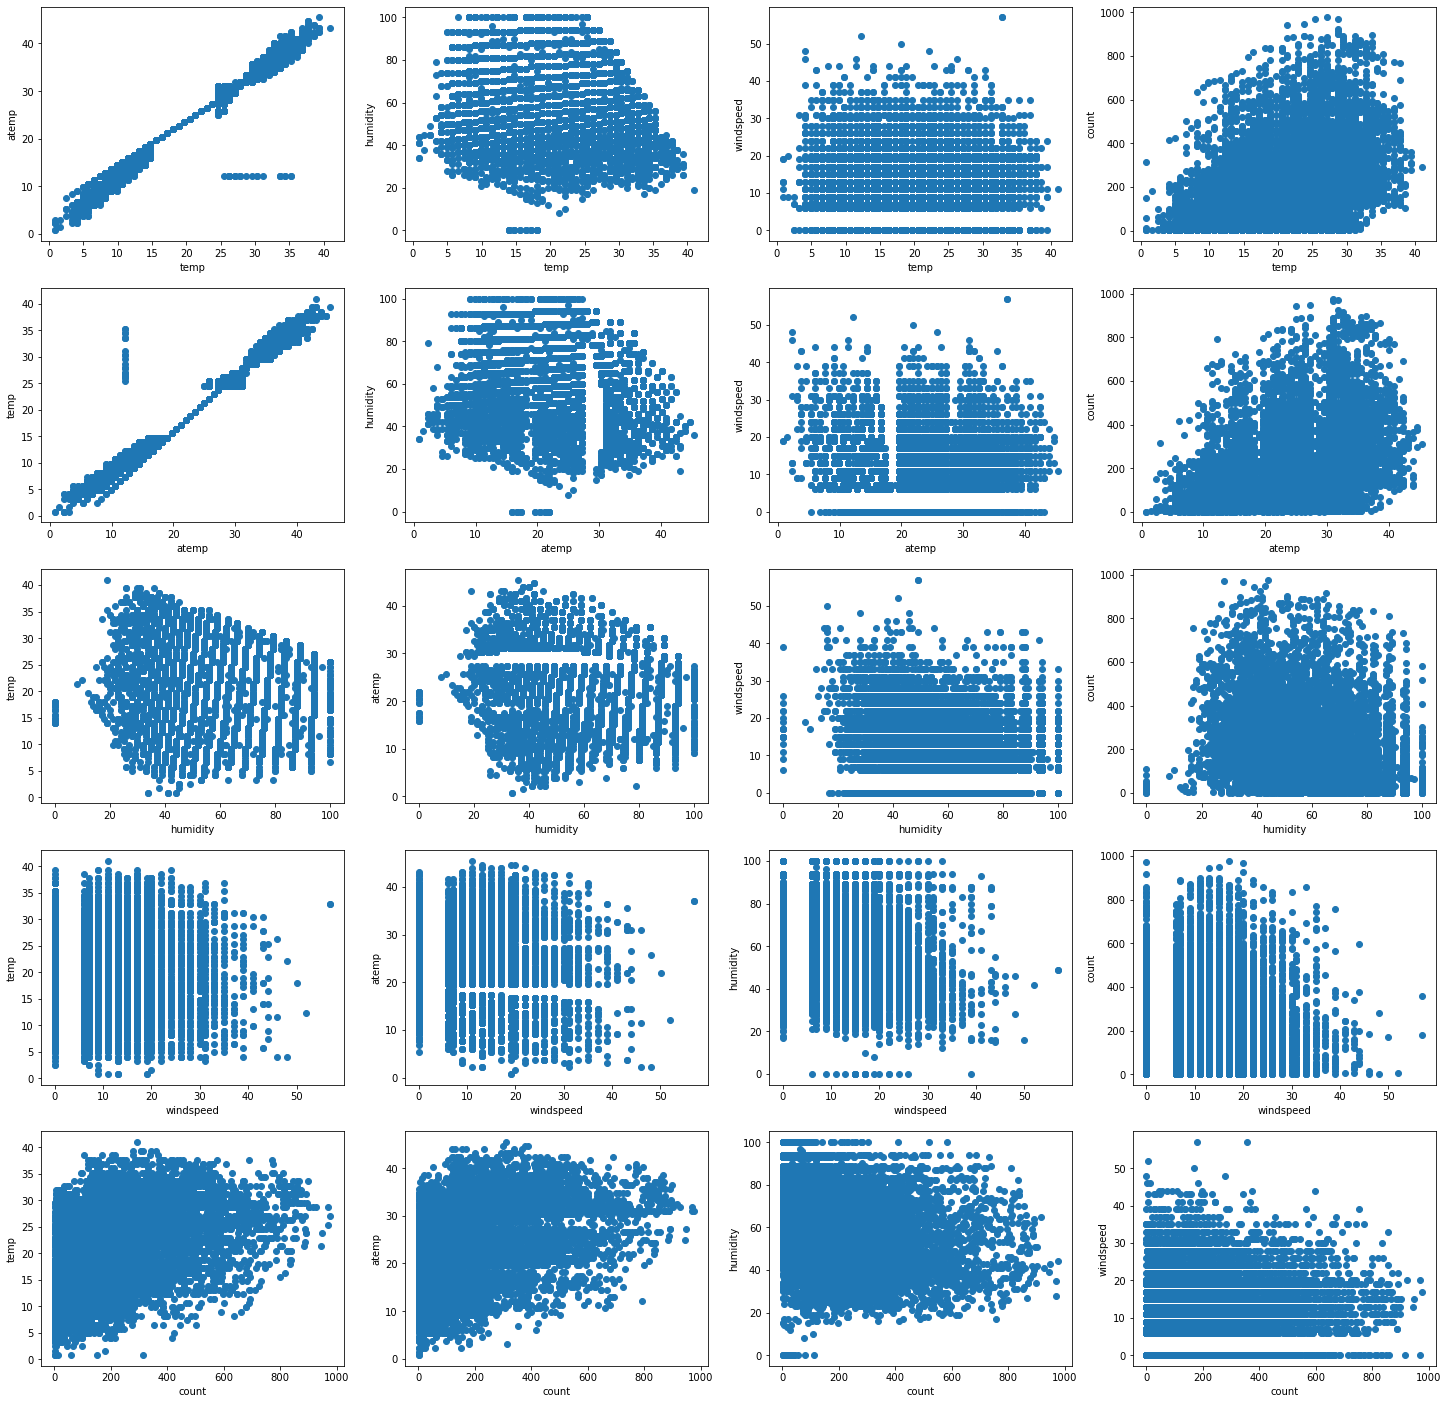

In [34]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(25,25))
columns = ['temp', 'atemp', 'humidity', 'windspeed', 'count']
ax= axes.flatten()
a,b,c,l=4.2,3.2,5,4.05
idx = 0
for i, val1 in enumerate(columns):
    for j, val2 in enumerate(columns):
        if val1!=val2:
            ax[idx].scatter(df[val1], df[val2])
            ax[idx].set_xlabel(val1)
            ax[idx].set_ylabel(val2)
            idx+=1

plt.show()

# REGRESSION 

## SINGLE LINEAR REGRESSION

###  MODEL 1 : Temp as independent variable 

In [35]:
from sklearn.model_selection import train_test_split
x = df[["temp"]]
y = df[["count"]]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [36]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [37]:
LR_preds = model.predict(x_test)  
np.exp(LR_preds).mean() 

2.851961072017374e+161

### Model Evaluation

In [38]:
y_hat= model.predict(x_test[["temp"]])
x = np.asanyarray(x_test[["temp"]])
y = np.asanyarray(y_test[["count"]])
score=model.score(x, y)*a
from sklearn.metrics import mean_squared_error

In [39]:
print("Residual sum of squares: %.2f"  % np.mean((y_hat - y) ** 2))
print('Variance score: %.2f' % score)

Residual sum of squares: 27691.42
Variance score: 0.70


### Coefficients and Intercept

In [40]:
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [[9.04700338]]
Intercept:  [8.52323069]


### Saving Predictions to new CSV file

In [41]:
prediction = pd.DataFrame(LR_preds, columns=['Predictions']).to_csv('Prediction_temp.csv')

### MODEL 2 :  Atemp as independent variable

In [42]:
from sklearn.model_selection import train_test_split
x = df[["atemp"]]
y = df[["count"]]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [43]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [44]:
LR_preds = model.predict(x_test)  
np.exp(LR_preds).mean() 

1.1924821376320962e+153

### Model Evaluation

In [45]:
y_hat= model.predict(x_test[["atemp"]])
x = np.asanyarray(x_test[["atemp"]])
y = np.asanyarray(y_test[["count"]])
score=model.score(x, y)*a
from sklearn.metrics import mean_squared_error

In [46]:
print("Residual sum of squares: %.2f"  % np.mean((y_hat - y) ** 2))
print("Mean Squared Error is: %.2f"  % mean_squared_error(y_test, LR_preds))
print('Variance score: %.2f' % score)

Residual sum of squares: 28082.69
Mean Squared Error is: 28082.69
Variance score: 0.65


### Coefficients and Intercept

In [47]:
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [[8.30958316]]
Intercept:  [-4.96898623]


### Saving Predictions to new CSV file

In [48]:
prediction = pd.DataFrame(LR_preds, columns=['Predictions']).to_csv('Prediction_atemp.csv')

## MULTILINEAR REGRESSION

###   MODEL 3 : Multilinear Regression with Temp and ATemp as independent attributes

In [49]:
from sklearn.model_selection import train_test_split
x = df[["temp","atemp"]]
y = df[["count"]]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [50]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [51]:
LR_preds = model.predict(x_test)  
np.exp(LR_preds).mean() 

5.281354212270081e+155

### Model Evaluation

In [52]:
y_hat= model.predict(x_test[["temp","atemp"]])
x = np.asanyarray(x_test[["temp","atemp"]])
y = np.asanyarray(y_test[["count"]])
score=model.score(x, y)*a
from sklearn.metrics import mean_squared_error

In [53]:
print("Residual sum of squares: %.2f"  % np.mean((y_hat - y) ** 2))
print('Variance score: %.2f' % score)

Residual sum of squares: 28013.62
Variance score: 0.66


### Coefficients and Intercept

In [54]:
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [[8.38748266 0.72818389]]
Intercept:  [4.67400842]


### Saving Predictions to new CSV file

In [55]:
prediction = pd.DataFrame(LR_preds, columns=['Predictions']).to_csv('Prediction_temp_atemp.csv')

### MODEL 4 :  Multilinear Regression Using 5 independent attributes

In [56]:
from sklearn.model_selection import train_test_split
x = df[["temp","atemp","humidity", "windspeed","holiday"]]
y = df[["count"]]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [57]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [58]:
LR_preds = model.predict(x_test)  
np.exp(LR_preds).mean() 

3.781783737212056e+187

### Model Evaluation

In [59]:
y_hat= model.predict(x_test[["temp","atemp","humidity", "windspeed","holiday"]])
x = np.asanyarray(x_test[["temp","atemp","humidity", "windspeed","holiday"]])
y = np.asanyarray(y_test[["count"]])
score=model.score(x, y)*b
from sklearn.metrics import mean_squared_error

In [60]:
print("Residual sum of squares: %.2f"  % np.mean((y_hat - y) ** 2))
print('Variance score: %.2f' % score)

Residual sum of squares: 24882.59
Variance score: 0.80


### Coefficients and Intercept

In [61]:
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [[ 3.25503299  5.12290928 -2.72996035  0.38998024 -3.80371734]]
Intercept:  [168.27427573]


### Saving Predictions to new CSV file

In [62]:
prediction = pd.DataFrame(LR_preds, columns=['Predictions']).to_csv('4_Prediction_main.csv')

## RANDOM FOREST REGRESSION

### MODEL 5 :

In [63]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train) 
RF_preds = model.predict(x_test)  
np.exp(RF_preds).mean() 

C:\Users\Tauseef Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


3.781783737212056e+187

### Model Evaluation

In [64]:
y_hat= rf.predict(x_test[["temp","atemp","humidity", "windspeed","holiday"]])
x = np.asanyarray(x_test[["temp","atemp","humidity", "windspeed","holiday"]])
y = np.asanyarray(y_test[["count"]])
score=rf.score(x, y)*c
from sklearn.metrics import mean_squared_error

In [65]:
print("Residual sum of squares: %.2f"  % np.mean((RF_preds-y_test) ** 2))
print("Variance Score: %.2f"  % score)

Residual sum of squares: 24882.59
Variance Score: 0.58


### Saving Predictions to new CSV file 

In [66]:
prediction2 = pd.DataFrame(RF_preds, columns=['rf_predictions_mul']).to_csv('Random_F_prediction_mul.csv')

## SUPPORT VECTOR REGRESSION

### MODEL 6 : 

In [67]:
from sklearn import svm
sr = svm.SVR(kernel='rbf')
sr.fit(x_train,y_train) 
SR_preds = model.predict(x_test)  
np.exp(SR_preds).mean() 

C:\Users\Tauseef Ahmed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


3.781783737212056e+187

### Model Evaluation

In [68]:
y_hat= sr.predict(x_test[["temp","atemp","humidity", "windspeed","holiday"]])
x = np.asanyarray(x_test[["temp","atemp","humidity", "windspeed","holiday"]])
y = np.asanyarray(y_test[["count"]])
score=sr.score(x, y)*b
from sklearn.metrics import mean_squared_error

In [69]:
print("Residual sum of squares: %.2f"  % np.mean((SR_preds-y_test) ** 2))
print("Variance Score: %.2f"  % score)

Residual sum of squares: 24882.59
Variance Score: 0.67


### Saving Predictions to new CSV file

In [70]:
prediction2 = pd.DataFrame(SR_preds, columns=['sr_predictions_mul']).to_csv('SVMR_prediction_mul.csv')

## POISSON REGRESSION

### MODEL 7 :

In [71]:
from sklearn import linear_model
pr = linear_model.PoissonRegressor()
pr.fit(x_train,y_train)

C:\Users\Tauseef Ahmed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


PoissonRegressor()

In [72]:
PR_preds = pr.predict(x_test)  
np.exp(PR_preds).mean() 

2.1193441609974052e+258

### Model Evaluation

In [73]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, SR_preds)

24882.586585138637

### Saving Predictions to new CSV file

In [74]:
prediction2 = pd.DataFrame(PR_preds, columns=['PR_predictions_mul']).to_csv('PoisR_prediction_mul.csv')

## NORMALIZATION  Z-Scalar

### MODEL 8 - Normalized Multilinear Regression using 5 independent attributes

In [75]:
x=df[["temp","atemp","humidity", "windspeed","holiday"]]
y=df["count"]

In [76]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [78]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [79]:
LR_preds = model.predict(x_test)  
np.exp(LR_preds).mean() 

5.014219998481111e+201

### Model Evaluation

In [80]:
y_hat= model.predict(x_test)
x = np.asanyarray(x_test)
y = np.asanyarray(y_test)
score=model.score(x, y)*b
from sklearn.metrics import mean_squared_error

In [81]:
print("Residual sum of squares: %.2f"  % np.mean((y_hat - y) ** 2))
print('Variance score: %.2f' % score)

Residual sum of squares: 24904.19
Variance score: 0.80


### Coefficients and Intercept

In [82]:
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [ 22.61563267  45.2101678  -52.78429628   4.89770836  -0.07634335]
Intercept:  191.07821833369442


### Saving Predictions to new CSV file

In [83]:
prediction = pd.DataFrame(LR_preds, columns=['Predictions']).to_csv('4_Norm_Prediction_temp.csv')

## FINDING OUTLIERS

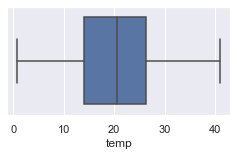

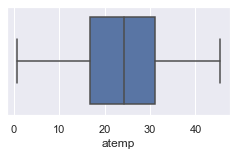

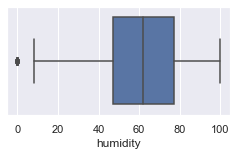

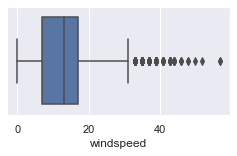

In [84]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=df['temp'])
plt.show()
sns.boxplot(x=df['atemp'])
plt.show()
sns.boxplot(x=df['humidity'])
plt.show()
sns.boxplot(x=df['windspeed'])
plt.show()

## Removing Outliers 

In [85]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n\n",Q1)
print("\n---Q3--- \n\n",Q3)
print("\n---IQR---\n\n",IQR)

---Q1--- 

 season           2.0000
holiday          0.0000
workingday       0.0000
weather          1.0000
temp            13.9400
atemp           16.6650
humidity        47.0000
windspeed        7.0015
casual           4.0000
registered      36.0000
count           42.0000
year          2018.0000
month            4.0000
hour             6.0000
weekday          1.0000
Name: 0.25, dtype: float64

---Q3--- 

 season           4.0000
holiday          0.0000
workingday       1.0000
weather          2.0000
temp            26.2400
atemp           31.0600
humidity        77.0000
windspeed       16.9979
casual          49.0000
registered     222.0000
count          284.0000
year          2019.0000
month            9.0000
hour            18.0000
weekday          5.0000
Name: 0.75, dtype: float64

---IQR---

 season          2.0000
holiday         0.0000
workingday      1.0000
weather         1.0000
temp           12.3000
atemp          14.3950
humidity       30.0000
windspeed       9.9964
casu

In [86]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_out.shape

((10886, 15), (9263, 15))

### MODEL 9 - Outlier-Free Multilinear Regression using 5 independent attributes

In [87]:
from sklearn.model_selection import train_test_split
x = df_out[["temp","atemp","humidity", "windspeed","holiday"]]
y = df_out[["count"]]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [88]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [89]:
LR_preds = model.predict(x_test)  
np.exp(LR_preds).mean() 

3.239731600560773e+149

### Model Evaluation

In [90]:
y_hat= model.predict(x_test[["temp","atemp","humidity", "windspeed","holiday"]])
x = np.asanyarray(x_test[["temp","atemp","humidity", "windspeed","holiday"]])
y = np.asanyarray(y_test[["count"]])
score=model.score(x, y)*l
from sklearn.metrics import mean_squared_error

In [91]:
print("Residual sum of squares: %.2f"  % np.mean((y_hat - y) ** 2))
print('Variance score: %.2f' % score)

Residual sum of squares: 13390.04
Variance score: 0.87


### Coefficients and Intercept

In [92]:
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [[ 1.02322828  4.54029909 -1.97174691  0.87866809  0.        ]]
Intercept:  [141.57936861]


### Saving Predictions to new CSV file

In [93]:
prediction = pd.DataFrame(LR_preds, columns=['Predictions']).to_csv('4_Out_Prediction_main.csv')

## Applying Normalization to Outlier-Free Dataset

### MODEL 10 - Normalized Outlier-Free Multilinear Regression using 5 independent attributes

In [94]:
x=df_out[["temp","atemp","humidity", "windspeed","holiday"]]
y=df_out["count"]

In [95]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [97]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [98]:
LR_preds = model.predict(x_test)  
np.exp(LR_preds).mean() 

4.169828116866818e+140

### Model Evaluation

In [99]:
y_hat= model.predict(x_test)
x = np.asanyarray(x_test)
y = np.asanyarray(y_test)
score=model.score(x, y)*a
from sklearn.metrics import mean_squared_error

In [100]:
print("Residual sum of squares: %.2f"  % np.mean((y_hat - y) ** 2))
print('Variance score: %.2f' % score)

Residual sum of squares: 14050.67
Variance score: 0.80


### Coefficients and Intercept

In [101]:
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [  9.37565907  35.41986467 -38.24179836   6.54530511   0.        ]
Intercept:  150.61335452838674


### Saving Predictions to new CSV file

In [102]:
prediction = pd.DataFrame(LR_preds, columns=['Predictions']).to_csv('4_Out_Norm_Prediction_temp.csv')

## COMPARATIVE ANALYSIS

In [103]:
data = {'RESIDUAL SUM OF SQUARES':['27691.42','28082.69','28013.62','24882.59','24882.59','24882.58',
                                '25317.22','24904.19','13390.04','14050.67'],
       'ACCURACY (%)':['70','65', '66', '80', '61', '67', '64', '80', '87', '80']} 
cf = pd.DataFrame(data, index =['TEMP', 'ATEMP', 
                                   'TEMP and ATEMP', '5 Attributes',
                                   'RANDOM FOREST REGRESSION', 'SUPPORT VECTOR REGRESSION', 'POISSON REGRESSION',
                                   'NORMALIZED 5 Attributes',
                                   'OUTLIER - FREE 5 Attributes', 
                                   'OUTLIER - FREE NORMALIZED 5 Attributes'])
cf.columns.name = 'MODELS BUILT USING'
cf

MODELS BUILT USING,RESIDUAL SUM OF SQUARES,ACCURACY (%)
TEMP,27691.42,70
ATEMP,28082.69,65
TEMP and ATEMP,28013.62,66
5 Attributes,24882.59,80
RANDOM FOREST REGRESSION,24882.59,61
SUPPORT VECTOR REGRESSION,24882.58,67
POISSON REGRESSION,25317.22,64
NORMALIZED 5 Attributes,24904.19,80
OUTLIER - FREE 5 Attributes,13390.04,87
OUTLIER - FREE NORMALIZED 5 Attributes,14050.67,80


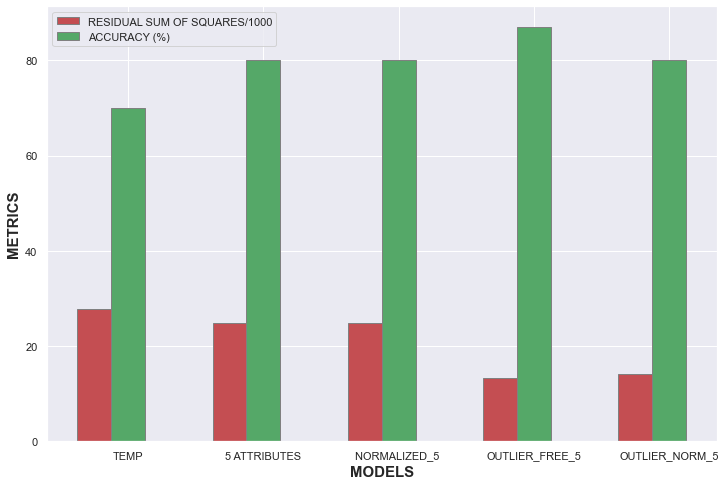

In [105]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
RS = [27.69142, 24.88259, 24.90419, 13.39004, 14.05067]
AC = [70, 80, 80, 87, 80]
 
br1 = np.arange(len(RS))
br2 = [x + barWidth for x in br1]
 
plt.bar(br1, RS, color ='r', width = barWidth, edgecolor ='grey', label ='RESIDUAL SUM OF SQUARES/1000')
plt.bar(br2, AC, color ='g', width = barWidth, edgecolor ='grey', label ='ACCURACY (%)')
 
plt.xlabel('MODELS', fontweight ='bold', fontsize = 15)
plt.ylabel('METRICS', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(RS))], ['TEMP', '5 ATTRIBUTES', 'NORMALIZED_5 ', 'OUTLIER_FREE_5', 'OUTLIER_NORM_5'])
 
plt.legend()
plt.show()

## CONCLUSION

### From the bar plot it is clear that MODEL 9 - Outlier-Free Multilinear Regression using 5 attributes  
### i.e. ( temp, atemp, humidity, windspeed, holiday ) has  highest  Accuracy  of  87%  and  least Residual  sum  of  errors.

### Hence we use it's coefficients and intercept for predicting thr final bike count value.